# Computer Vision Tutorial for Beginners | Learn Computer Vision


* [Computer Vision Tutorial for Beginners | Learn Computer Vision](https://www.projectpro.io/data-science-in-python-tutorial/computer-vision-tutorial-for-beginners#mcetoc_1fcvfccbed)



![image.png](https://dezyre.gumlet.io/images/tutorial/computer-vision-tutorial-for-beginners/image_44513273631635934892538.png?w=1140&dpr=1.0)

## Image Processing
The four prominent color spaces provided by OpenCV are RGB, HSV, YCrCb and LAB.
### RGB 
RGB stands for the three colours - Red, Green and Blue. The pixels of an RGB image are made up with a linear combination of the colour intensities of Red, Green and Blue. The color differentiation is heavily dependent on the lighting conditions. Under bright lighting, the segregation of colours can be more visible as opposed to dull lighting. Hence, to perform colour based segmentation, RGB color space is not a good choice as the information related to color and luminance is mixed. 

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px 
import cv2
from google.colab.patches import cv2_imshow
from urllib.request import urlopen

In [2]:
Sample_data = [[1,30,25],
               [4,56,60],
               [2,34,45]]
fig = px.imshow(Sample_data)
fig.show()

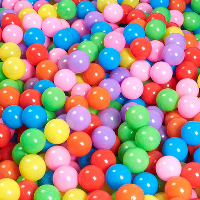

In [3]:
req = urlopen('https://m.media-amazon.com/images/I/71+lhfBo9LL._AC_SL1500_.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
# if you want 3D array, change img to this img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.resize(img, (200,200))
cv2_imshow(img)

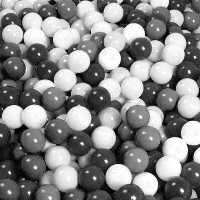

In [14]:
# Extracting Blue Channel
Blue_image = img[:,:,0]
cv2_imshow(Blue_image)

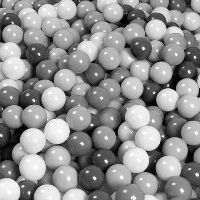

In [15]:
# Extracting Green Channle
Green_image = img[:,:,1]
cv2_imshow(Green_image)

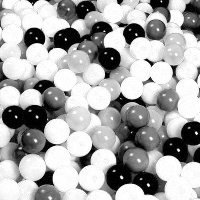

In [16]:
# Extracting Green Channle
Red_image = img[:,:,2]
cv2_imshow(Red_image)

### HSV
![image](https://dezyre.gumlet.io/images/tutorial/computer-vision-tutorial-for-beginners/image_810714759431628842955458.png?w=1140&dpr=1.0)

The three channels in an HSV image are - Hue (H), Saturation (S) and Value (V). 

- Hue channel contains information related to color.

- Saturation channel comprises of the shades of the color. 

- Value stands for the intensity of the luminance. 

The components of hue and saturation remain majorly indifferent to lighting conditions. The value component will change as per the lighting. Since in HSV color space, sources of chrominance and luminance are separate, it becomes easier to perform color segmentation by specifying a threshold. 


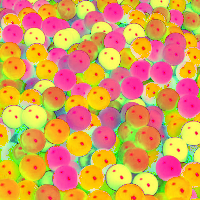

In [17]:
# Creating HSV Image
HSV_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(HSV_image)

### YCrCb
![image](https://dezyre.gumlet.io/images/tutorial/computer-vision-tutorial-for-beginners/image_795394696341628842955317.png?w=1140&dpr=1.0)

In YCrCb color space, Y stands for luma (intensity of luminance), Cr represents the red component after subtracting the luma component (R - Y) and similarly, Cb represents the blue component after subtracting the luma component (B - Y). Again, the distinct components of chroma and luminance aid in the effective separation of the colors; specifically, this color space works best for distinguishing the red and blue colors from an image. 

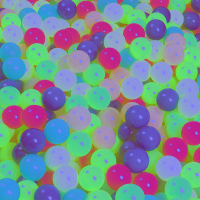

In [19]:
# Converting to YCrCb
YCrCb_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
cv2_imshow(YCrCb_image)

### LAB
![image](https://dezyre.gumlet.io/images/tutorial/computer-vision-tutorial-for-beginners/image_826759818631628842957498.png?w=1140&dpr=1.0)

This color space also encodes the information of luminance and chroma in separate channels. The L channel corresponds to lightness (lighting intensity). The A and B components store color details, with the former consisting of color components ranging from green to magenta and the latter blue to yellow. As mentioned, the change in illumination will affect the Y component. The A and B components will significantly show the difference of color information irrespective of lighting conditions. 

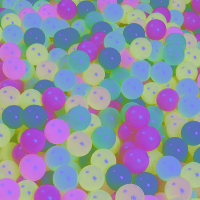

In [30]:
# Creating LAB Image
LAB_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(LAB_image)

## Image Filtering
Image filtering can be used for many purposes, such as blurring, sharpening or detecting edges of an image. It involves performing convolution of the image with a 2D kernel matrix. Convolution involves sliding the kernel over the input image and performing element-wise multiplication followed by addition. 

### “filter2D()”
“filter2D()” is a function provided by OpenCV which helps perform convolution of an image with any predefined custom kernel. The function requires three parameters - **src**, **ddepth** and **kernel**. 

- **src** is the input image 

- **ddepth** represents the depth of the output image. Keeping a default value to -1 will maintain the same depth of input and output image. 

- **kernel** is the custom convolution matrix 

Now let’s begin discussing the different operations on an image.

### Blurring
- [OpenCV Smoothing and Blurring](https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/) 
- [Smoothing Images](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)

Image blurring also referred to as smoothening, is an essential step in any image processing application. **Blurring is usually a preprocessing step when dealing with edge detection as it helps reduce the noise around the edges of the objects**. 

Mainly three types of blurring techniques are used - Median Blurring, Gaussian Blurring, and Bilateral Filtering. 

In general, I tend to recommend starting with a simple **Gaussian blur** and tuning your parameters as needed. While the Gaussian blur is slightly slower than a simple average blur (and only by a tiny fraction), a Gaussian blur tends to give much nicer results, especially when applied to natural images.

Traditionally, the **median blur** method has been most effective when removing salt-and-pepper noise. This type of noise is exactly what it sounds like: imagine taking a photograph, putting it on your dining room table, and sprinkling salt and pepper on top of it. Using the median blur method, you could remove the salt and pepper from your image.

Thus far, the intention of our blurring methods have been to reduce noise and detail in an image; however, as a side effect we have tended to lose edges in the image. To reduce noise while still maintaining edges, we can use bilateral blurring. **Bilateral blurring** accomplishes this by introducing two Gaussian distributions.

[Commonly used kernels](https://www.analyticsvidhya.com/blog/2021/08/sharpening-an-image-using-opencv-library-in-python/):
![image](https://editor.analyticsvidhya.com/uploads/81269Capture.PNG)


1. **Simple Blurring**

The basic blurring simply involves averaging the pixel values of the image. For example, you can construct a custom 3*3 kernel consisting of ones and divide it with 9. Convolution of this kernel with the image will cause the blurring effect. 

Q: to change array, how it will effect image???

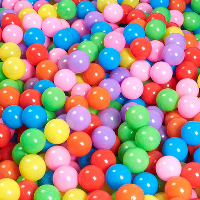

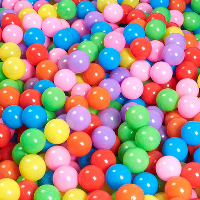

In [7]:
conv_kernel = np.array([[0,0,0],
                       [0,1,0],
                       [0,0,0]])
conv = cv2.filter2D(img, -1, conv_kernel)
cv2_imshow(img)
cv2_imshow(conv)

OpenCV also provides a function called ‘blur()’, which does image blurring. In this function, only the kernel size needs to be mentioned, then, it will create a blur matrix on its own and perform blurring. 

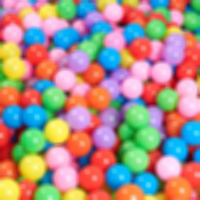

In [9]:
Blur_img = cv2.blur(img, (5,5))
cv2_imshow(Blur_img)

2. **Gaussian Blurring**
This blurring technique uses a Gaussian filter. Instead of directly averaging all the values with a constant number, a weighted average will take place here. The image pixels’ distance from the kernel’s centre will determine their corresponding weight involved in the weighted average. Pixels nearby the centre have more weight as opposed to the farther pixels. 

OpenCV provides the function ‘GaussianBlur()’, which primarily requires four arguments - src, ksize, sigmaX and sigmaY.

- **src** is the input image

- **ksize** is the size of the Gaussian kernel 

- **sigmaX** is the standard deviation of Gaussian kernel in the horizontal direction; the default value is 0

- **sigmaY** is the standard deviation of Gaussian kernel in the vertical direction; the default value is 0

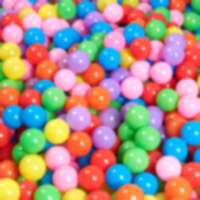

In [11]:
Blur_image = cv2.GaussianBlur(img, (5,5), sigmaX = 0, sigmaY = 0)
cv2_imshow(Blur_image)

3. **Median Blurring**
This kind of blurring involves the replacement of the pixel values in the original image with the median value of the pixels present in the area covered by the blurring kernel. 

The function used is ‘medianBlur()’. It requires only the input image and the kernel size of the median filter as its arguments. 

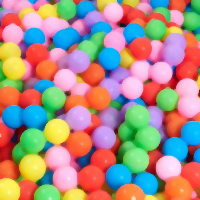

In [19]:
median_blur = cv2.medianBlur(img, 5)
cv2_imshow(median_blur)

4. **Bilateral Filtering**
Blurring an entire image is not a good choice when information related to sharp edges needs to be preserved. In that case, bilateral filtering comes handy. It selectively blurs the image based on the similarity of pixel values in a neighbourhood. This filter contains the property of Gaussian filter, i.e. filtering based on the distance from the kernel centre and the pixel intensities present in a neighbourhood of the image. Hence, it helps to maintain the edge structure of an image. 

OpenCV provides the ‘bilateralFilter()’ function. It primarily has four arguments - src, d, sigmaColor, sigmaSpace. 

src is the input image 

d is the value of diameter to be considered for pixel neighbourhood while filtering

sigmaSpace determines the spatial distribution of the kernel (similar to Gaussian filter) 

sigmaColor determines the threshold for the difference between pixel intensities that could be allowed

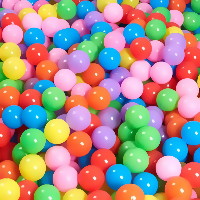

In [13]:
Bilateral_image = cv2.bilateralFilter(img, d = 9, sigmaColor = 60, sigmaSpace = 60)
cv2_imshow(Bilateral_image)

## Image Sharpening
Image sharpening is just the opposite of blurring. It emphasises the variation in the neighbouring pixels so that edges look more vivid. 

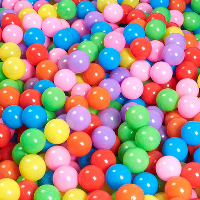

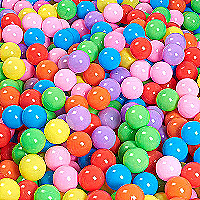

In [17]:
sharp_kernel = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
sharpv = cv2.filter2D(img, -1, sharp_kernel)
cv2_imshow(img)
cv2_imshow(sharpv)

## Edge Detection

## Morphological Operations

## Deep Learning Concepts to Learn Computer Vision

## Image Classification

## Object Detection

## Semantic Segmentation